In [3]:
# 1. Import libraries and modules
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np
from dataset import load_hoda
import matplotlib.pyplot as plt

In [4]:
# Load pre-shuffled HODA data into train and test sets
X_train, y_train, X_test, y_test = load_hoda(
                                            training_sample_size=3500,
                                            test_sample_size=400,size=32)

# reshape

In [5]:
X_train.shape

(3500, 1024)

In [6]:

# Reshape to original image shape (n x 784)  ==> (n x 28 x 28 x 1)
X_train_32 = X_train.reshape(-1,32,32,1)
X_test_32 = X_test.reshape(-1,32,32,1)
X_train_32.shape

(3500, 32, 32, 1)

In [7]:
import cv2
import numpy as np

In [8]:
X_train_28 = np.zeros((X_train_32.shape[0], 28, 28, 1))
for i in range(X_train_32.shape[0]):
    # Resize the sample from shape (32, 32, 1) to shape (28, 28, 1) using OpenCV
    resized_sample = cv2.resize(X_train_32[i], (28, 28), interpolation=cv2.INTER_AREA)
    # Assign the resized sample to the corresponding index in the new numpy array
    X_train_28[i] = resized_sample.reshape((28, 28, 1))

X_test_28 = np.zeros((X_test_32.shape[0], 28, 28, 1))
for i in range(X_test_32.shape[0]):
    # Resize the sample from shape (32, 32, 1) to shape (28, 28, 1) using OpenCV
    resized_sample = cv2.resize(X_test_32[i], (28, 28), interpolation=cv2.INTER_AREA)
    # Assign the resized sample to the corresponding index in the new numpy array
    X_test_28[i] = resized_sample.reshape((28, 28, 1))

In [9]:
import matplotlib.pyplot as plt

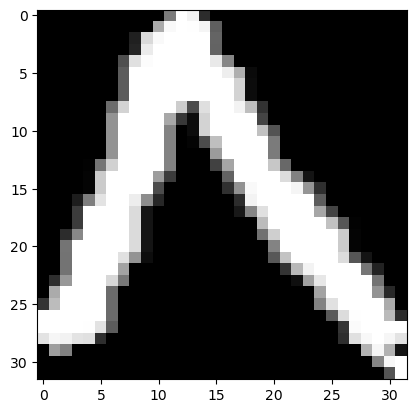

In [10]:
plt.imshow(X_test_32[0][:,:,0], cmap='gray')

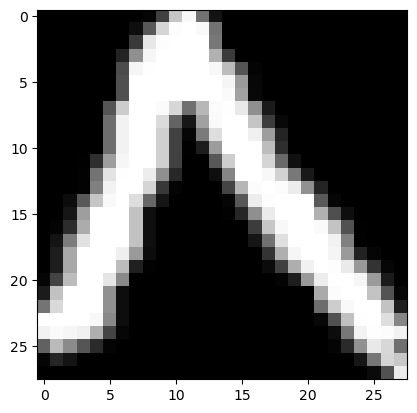

In [11]:
plt.imshow(X_test_28[0][:,:,0], cmap='gray')

In [12]:
# Preprocess input data
'''normalize our data values to the range [0, 1]'''
X_train_32 = X_train_32.astype('float32')
X_test_32 = X_test_32.astype('float32')
X_train_32 /= 255
X_test_32 /= 255

# Preprocess input data
'''normalize our data values to the range [0, 1]'''
X_train_28 = X_train_28.astype('float32')
X_test_28 = X_test_28.astype('float32')
X_train_28 /= 255
X_test_28 /= 255


In [13]:

# 4. Preprocess class labels
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)


# 1st senario

In [14]:
# 5. Define model architecture
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))


# 6. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


# 7. Fit model on training data
history = model.fit(X_train_28, y_train,
          epochs=200, batch_size=256, validation_split=0.2)


C:\Users\Public\ANACONDA\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 139ms/step - accuracy: 0.2436 - loss: 2.1484 - val_accuracy: 0.6029 - val_loss: 1.7734
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - accuracy: 0.5154 - loss: 1.5017 - val_accuracy: 0.7786 - val_loss: 0.8823
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - accuracy: 0.6639 - loss: 0.9843 - val_accuracy: 0.8414 - val_loss: 0.5403
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.7454 - loss: 0.7747 - val_accuracy: 0.8600 - val_loss: 0.4372
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.8000 - loss: 0.6137 - val_accuracy: 0.8814 - val_loss: 0.3347
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - accuracy: 0.8429 - loss: 0.4954 - val_accuracy: 0.9000 - val_loss: 0.2798
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 0.8632 - loss: 0.4302 - val_accuracy: 0.9229 - val_loss: 0.2233
Epoch 8/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.8750 - loss: 0.3753 - val_accu

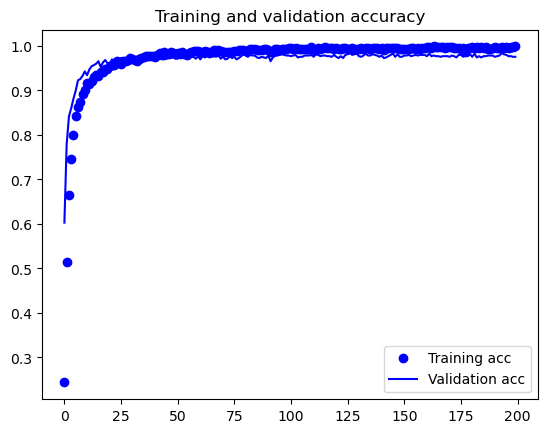

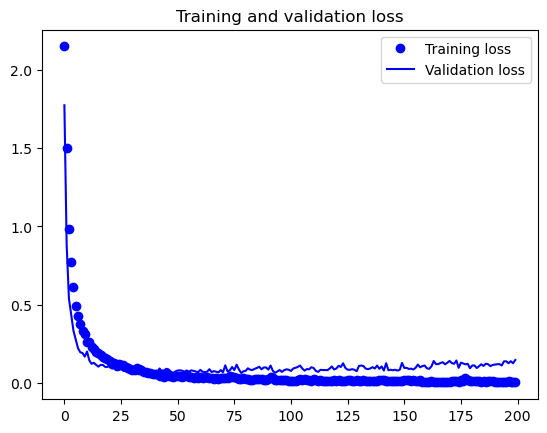

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [16]:
model.evaluate(X_test_28, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9750 - loss: 0.1361


[0.13612978160381317, 0.9750000238418579]

Can you feed data with different dimention (such as 32x32)?

In [ ]:
model.evaluate(X_test_32, y_test)

No! you cannot! It raises "Matrix size-incompatible" Error,
because we have used FC layers with **Flatten**

## solution?!

In [ ]:
model.summary()

In [ ]:
# 5. Define model architecture
model1 = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(32, 32, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model1.summary()

In [47]:
# 5. Define model architecture
model2 = Sequential([
   
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    Dropout(0.5),
    layers.Dense(10, activation='softmax'),
])



In [45]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [46]:
model2.predict(X_train_32[:5])
model2.summary()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)              │ (5, 30, 30, 32)        │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (5, 15, 15, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (5, 13, 13, 64)        │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (5, 6, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (5, 4, 4, 64)          │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_7      │ (5, 64)                │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (5, 64)                │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (5, 64)                │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (5, 10)                │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,554 (236.54 KB)

 Trainable params: 60,554 (236.54 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
model2.predict(X_train_28[:5])
model2.summary()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (5, 26, 26, 32)        │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (5, 13, 13, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (5, 11, 11, 64)        │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (5, 5, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (5, 3, 3, 64)          │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_8      │ (5, 64)                │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (5, 64)                │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (5, 64)                │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (5, 10)                │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,554 (236.54 KB)

 Trainable params: 60,554 (236.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 6. Compile model
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


# 7. Fit model on training data
history = model2.fit(X_train_28, y_train,
          epochs=80, batch_size=256, validation_split=0.2)


Epoch 1/80


## lets evaluate it with 28x28

In [41]:
model2.evaluate(X_test_28, y_test)

ValueError: You must call `compile()` before using the model.

## Now try it with different size!!!!

In [40]:
model.evaluate(X_test_32, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9850 - loss: 0.0602  


[0.060213468968868256, 0.9850000143051147]